# ALPHACODE EXPLORE DATA ANALYSIS AND EXPLORATION MINI-PROJECT: 


![title](risk-everything.jpg)

# Aim

The goal of these exercises is to help any supporter (hopefully) make informed decisions before placing any stake in a team. Despite how naive some of the tests may may seem, the idea is to understand the aspects of the game are partially predictable, and which are as good as rolling a die and hoping for the best outcome. In this way, the analyses of this report may help evaluate a decision to support a player or squad.


We would like to devise a confidence measure of sorts for an average-rate footballer becoming world-class. That is, we explore the characteristics of a good footballer to determine whether a given player will reach a certain level of greatness. Of course, instead of basing a hypothesis on a thorough study, one could simply determine the likelihood of success based on the frequency of successes of former young aspirants, which would render this study void. 
But, this analysis is revealed useful since we tailor a hypothesis that can be used for any player, with the disclaimer that football, like any other career, is not one whose model perfectly represents each subject. This gives rise to some very key simplifying assumptions:

* The data used is at least a rough representation of reality
* The team for which a subject plays is immaterial to his predicted outcome (how good they will be)

This notebook takes the form of a narrated simulation. A series of tests will be run that will help Dr. Asdfg evaluate his chances of making it as a world-class footballer. For simplicity, Dr. Asdfg will take the attributes of a random player in this dataset.

Note that his circumstances may be customised (tweaked using the functions created) based on the level of skill (defined as 'overall' throughout the study) which Dr. Asdfg thinks he posesses. Albeit, all analyses done in this study are based on default values already set by the audience. **Thus, if these parameters are changed, you need to change the analyses.**
Another key assumption made is that the only this dataset shapes Dr.Asdfg's likelihood of success and no other external factors play a role in determining his success, unless otherwise stated.


### Notebook's contribution to the goal:

The factors that a player considers when choosing a team provide insight to a prediction that allows the predictor what attributes to consider when placing any sort of stake in a player.

We will answer the main question by answering the following question: 

**How much evidence can we propegate to place confidence in a player at the beginning of his career?**

## Using this notebook:

To avoid inconsistent results,
* Run all cells in sequence
* Run all cells once

## Imports

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('darkgrid')
import scipy.stats as scs
from math import sqrt
import scipy
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
pd.set_option('display.max_columns', None)

import sqlalchemy as sa
import pandas as pd
from sqlalchemy import create_engine

In [42]:
Username = 'admin'
Password = 'amazing_people'
Host = 'alphacode-explore.ccwgqdqrrmvt.eu-west-1.rds.amazonaws.com'
Port = '1433'
Database = 'Bill'

connection = create_engine(
    'mssql+pymssql://' +
    Username + ':' + Password + '@' + Host + ':' + Port + '/' + Database
)

sql_query = "Select * from football_players"



In [43]:
df = pd.read_sql_query(sql_query, connection)

## PLAYER-TEAM ANALYSIS

We will fit Dr. Asdfg to a team and conduct some tests that evaluate his impact on a team, and what factors he should consider when choosing a team.

In [44]:
# load_df = pd.read_csv(r'C:\Users\bseot\Documents\10X\EXPLORE\DATA\football_players-a-1298.csv', index_col=None)
# # display(fifa2.shape)
# # display(fifa2.columns)
# # display(fifa2.head())
# # fifa2.tail()
# df = pd.DataFrame(load_df)

In [45]:
print(df.dtypes)
display(df.describe())

Name                   object
Age                    object
Nationality            object
Overall                object
Acceleration           object
Aggression             object
Agility                object
Balance                object
Ball control           object
Composure              object
Crossing               object
Curve                  object
Dribbling              object
Finishing              object
Free kick accuracy     object
GK diving              object
GK handling            object
GK kicking             object
GK positioning         object
GK reflexes            object
Heading accuracy       object
Interceptions          object
Jumping                object
Long passing           object
Long shots             object
Marking                object
Penalties              object
Positioning            object
Reactions              object
Short passing          object
Shot power             object
Sliding tackle         object
Sprint speed           object
Stamina   

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
count,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981,17981
unique,16975,29,165,49,161,151,146,135,184,161,176,153,194,187,136,100,97,103,99,102,158,174,140,188,156,183,117,171,158,209,153,169,194,180,187,168,173,125,802
top,J. RodrÃ­guez,25,England,66,68,70,72,68,64,60,62,45,65,60,42,8,10,12,8,9,58,65,72,58,59,65,55,62,64,64,68,62,68,72,66,72,58,48,CB
freq,7,1522,1630,1105,706,495,605,609,739,708,527,395,694,428,466,1645,1643,1606,1622,1630,612,477,709,605,452,467,500,514,849,807,556,504,759,624,559,627,537,413,2216


In [46]:
# Select all attribute columns
cols = ['Overall', 'Acceleration', 'Aggression', 'Age',
       'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
       'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving',
       'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
       'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
       'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
       'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']

def to_float(x):    
    "Transforms attribute columns to type float"
    
    if type(x) is int:
        return float(x)
    else:
        return float(x[0:2])

df[cols] = df[cols].applymap(to_float)

In [47]:
fifa2 = df

In [48]:
print(fifa2.dtypes)


Name                    object
Age                    float64
Nationality             object
Overall                float64
Acceleration           float64
Aggression             float64
Agility                float64
Balance                float64
Ball control           float64
Composure              float64
Crossing               float64
Curve                  float64
Dribbling              float64
Finishing              float64
Free kick accuracy     float64
GK diving              float64
GK handling            float64
GK kicking             float64
GK positioning         float64
GK reflexes            float64
Heading accuracy       float64
Interceptions          float64
Jumping                float64
Long passing           float64
Long shots             float64
Marking                float64
Penalties              float64
Positioning            float64
Reactions              float64
Short passing          float64
Shot power             float64
Sliding tackle         float64
Sprint s

To make the dataset more legible, we'll the 'Preferred Positions', 'Sprint Speed' and 'Stamina' columns near the beginning of the dataframe since it is quite relevant with respect to the columns in the beginning of the dataframe. Then concert the 'Preferred_Positions' column to string datatype. Also, working with the index column may be tough, so we rename the 'Unnamed: 0' column to something that suits better its purpose: 'Index0'

##### (Please run the below cell only once per session )

In [49]:
fifa2.insert(10, 'Preferred_Position', fifa2['Preferred Positions'], allow_duplicates=False)
del fifa2['Preferred Positions']

fifa2.insert(12, 'Sprint_Speed', fifa2['Sprint speed'], allow_duplicates=False)
del fifa2['Sprint speed']

Stamina = fifa2['Stamina'].copy()
del fifa2['Stamina']
fifa2.insert(13, 'Stamina', Stamina, allow_duplicates=False)

fifa2['Preferred_Position'].to_string()
fifa2['Preferred_Position'] = fifa2['Preferred_Position'].str[:2]
fifa2.head()

fifa2.head()

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Preferred_Position,Crossing,Sprint_Speed,Stamina,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Standing tackle,Strength,Vision,Volleys
0,G. Figliomeni,30.0,Italy,65.0,34.0,68.0,32.0,48.0,51.0,65.0,RB,38.0,32.0,53.0,29.0,32.0,36.0,32.0,6.0,9.0,6.0,8.0,7.0,64.0,63.0,75.0,45.0,35.0,64.0,31.0,20.0,60.0,53.0,49.0,65.0,66.0,74.0,41.0,28.0
1,F. Melara,31.0,Italy,65.0,68.0,50.0,55.0,34.0,68.0,65.0,CA,66.0,67.0,67.0,62.0,65.0,48.0,59.0,6.0,8.0,16.0,15.0,12.0,70.0,48.0,62.0,57.0,49.0,41.0,58.0,63.0,68.0,59.0,56.0,44.0,46.0,81.0,62.0,49.0
2,L. Ochoa,32.0,Colombia,65.0,67.0,66.0,70.0,66.0,61.0,58.0,RB,70.0,69.0,65.0,60.0,58.0,50.0,40.0,10.0,11.0,12.0,13.0,11.0,63.0,59.0,70.0,54.0,57.0,64.0,33.0,58.0,65.0,62.0,70.0,64.0,66.0,60.0,56.0,40.0
3,G. Castrovilli,20.0,Italy,65.0,73.0,45.0,91.0,75.0,68.0,62.0,CM,58.0,67.0,34.0,56.0,58.0,55.0,41.0,14.0,12.0,11.0,11.0,15.0,49.0,50.0,55.0,67.0,32.0,46.0,55.0,67.0,57.0,70.0,60.0,54.0,45.0,30.0,65.0,48.0
4,A. Maitland-Niles,19.0,England,65.0,77.0,55.0,74.0,70.0,63.0,55.0,CM,60.0,72.0,72.0,44.0,65.0,51.0,36.0,15.0,9.0,7.0,10.0,13.0,38.0,61.0,58.0,66.0,54.0,57.0,54.0,56.0,62.0,68.0,58.0,58.0,59.0,68.0,60.0,39.0


## Position Type Column

##### (Please run the below cell only once per session )

In [50]:
fifa2['count'] = np.ones(fifa2.shape[0])
fifa2.head()


,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Preferred_Position,Crossing,Sprint_Speed,Stamina,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Standing tackle,Strength,Vision,Volleys,count
0,G. Figliomeni,30.0,Italy,65.0,34.0,68.0,32.0,48.0,51.0,65.0,RB,38.0,32.0,53.0,29.0,32.0,36.0,32.0,6.0,9.0,6.0,8.0,7.0,64.0,63.0,75.0,45.0,35.0,64.0,31.0,20.0,60.0,53.0,49.0,65.0,66.0,74.0,41.0,28.0,1.0
1,F. Melara,31.0,Italy,65.0,68.0,50.0,55.0,34.0,68.0,65.0,CA,66.0,67.0,67.0,62.0,65.0,48.0,59.0,6.0,8.0,16.0,15.0,12.0,70.0,48.0,62.0,57.0,49.0,41.0,58.0,63.0,68.0,59.0,56.0,44.0,46.0,81.0,62.0,49.0,1.0
2,L. Ochoa,32.0,Colombia,65.0,67.0,66.0,70.0,66.0,61.0,58.0,RB,70.0,69.0,65.0,60.0,58.0,50.0,40.0,10.0,11.0,12.0,13.0,11.0,63.0,59.0,70.0,54.0,57.0,64.0,33.0,58.0,65.0,62.0,70.0,64.0,66.0,60.0,56.0,40.0,1.0
3,G. Castrovilli,20.0,Italy,65.0,73.0,45.0,91.0,75.0,68.0,62.0,CM,58.0,67.0,34.0,56.0,58.0,55.0,41.0,14.0,12.0,11.0,11.0,15.0,49.0,50.0,55.0,67.0,32.0,46.0,55.0,67.0,57.0,70.0,60.0,54.0,45.0,30.0,65.0,48.0,1.0
4,A. Maitland-Niles,19.0,England,65.0,77.0,55.0,74.0,70.0,63.0,55.0,CM,60.0,72.0,72.0,44.0,65.0,51.0,36.0,15.0,9.0,7.0,10.0,13.0,38.0,61.0,58.0,66.0,54.0,57.0,54.0,56.0,62.0,68.0,58.0,58.0,59.0,68.0,60.0,39.0,1.0


## Section 1.1.2: Data Preparation - Dataset 2

A dataset containing the players with some extra feature variables may make for more interesting analyses. 


We continue with a dataset that is not squeaky clean either and go through the tedious process again...

#### Source: https://www.kaggle.com/kevinmh/fifa-18-more-complete-player-dataset/data

In [51]:
#Load Dataset with different name to avoid interference
fifa = fifa2
overall = fifa['Overall'].copy()
del fifa['Overall']
fifa.insert(11, 'overall1', overall, allow_duplicates = False)
fifa.rename(index = str, columns = {'overall1': 'overall'}, inplace = True)
fifa.head()

,Name,Age,Nationality,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Preferred_Position,Crossing,overall,Sprint_Speed,Stamina,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Standing tackle,Strength,Vision,Volleys,count
0,G. Figliomeni,30.0,Italy,34.0,68.0,32.0,48.0,51.0,65.0,RB,38.0,65.0,32.0,53.0,29.0,32.0,36.0,32.0,6.0,9.0,6.0,8.0,7.0,64.0,63.0,75.0,45.0,35.0,64.0,31.0,20.0,60.0,53.0,49.0,65.0,66.0,74.0,41.0,28.0,1.0
1,F. Melara,31.0,Italy,68.0,50.0,55.0,34.0,68.0,65.0,CA,66.0,65.0,67.0,67.0,62.0,65.0,48.0,59.0,6.0,8.0,16.0,15.0,12.0,70.0,48.0,62.0,57.0,49.0,41.0,58.0,63.0,68.0,59.0,56.0,44.0,46.0,81.0,62.0,49.0,1.0
2,L. Ochoa,32.0,Colombia,67.0,66.0,70.0,66.0,61.0,58.0,RB,70.0,65.0,69.0,65.0,60.0,58.0,50.0,40.0,10.0,11.0,12.0,13.0,11.0,63.0,59.0,70.0,54.0,57.0,64.0,33.0,58.0,65.0,62.0,70.0,64.0,66.0,60.0,56.0,40.0,1.0
3,G. Castrovilli,20.0,Italy,73.0,45.0,91.0,75.0,68.0,62.0,CM,58.0,65.0,67.0,34.0,56.0,58.0,55.0,41.0,14.0,12.0,11.0,11.0,15.0,49.0,50.0,55.0,67.0,32.0,46.0,55.0,67.0,57.0,70.0,60.0,54.0,45.0,30.0,65.0,48.0,1.0
4,A. Maitland-Niles,19.0,England,77.0,55.0,74.0,70.0,63.0,55.0,CM,60.0,65.0,72.0,72.0,44.0,65.0,51.0,36.0,15.0,9.0,7.0,10.0,13.0,38.0,61.0,58.0,66.0,54.0,57.0,54.0,56.0,62.0,68.0,58.0,58.0,59.0,68.0,60.0,39.0,1.0


In [52]:
fifa.overall

0        65.0
1        65.0
2        65.0
3        65.0
4        65.0
         ... 
17976    46.0
17977    46.0
17978    46.0
17979    46.0
17980    46.0
Name: overall, Length: 17981, dtype: float64

## PART 1.2: DATA ASSESSMENT

## Section 1.2.1: Player Assignment

After a careful consideration of his life choices, Dr.Asdfg thinks that he stands a fair chance at becoming a professional footballer, especiaally after taking early retirement from the military.

We will assign attribute values to Dr. Asdfg that are sampled from players aged 18 to 23 and have an overall rating in the 35th percentile (the worst 35 per cent of footballers)

To understand his place in the world of football, we consider at the average potential ratings of players and attribute his abilities by specifying his parameters below: 

Age range:
* age_low: 18
* age_high: 23

    and

Quantile: 35

In [53]:
class Player:
    age_low = 18
    age_high = 23 
    quantile = .35

    def __init__(self, age_low = age_low, age_high = age_high, quantile = quantile):
        fifa_age = fifa['Age'].between(age_low, age_high, inclusive = True)
        fifa_age = fifa[fifa_age].copy()
        self.fifa_age = fifa_age
        self.quantile = quantile
        fifa_age_potential = fifa_age['overall']
        self.fifa_age_potential = fifa_age_potential
        fifa_age_quantile = fifa_age_potential.between(fifa_age.quantile(quantile)['overall'], 100, inclusive = True)
        age_quantile_df = fifa_age[fifa_age_quantile]
        self.age_quantile_df = age_quantile_df
        player = age_quantile_df.sample(1)
        you = player.copy()
        self.you = you
    
    def you(self):
        return self.you
    
    def potential_df(self, quantile):
        return self.fifa_age_potential
    
    def age(self):
        return self.fifa_age
    def age_quant(self):
        return self.age_quantile_df


potential_df = Player()

In [54]:
fifa

,Name,Age,Nationality,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Preferred_Position,Crossing,overall,Sprint_Speed,Stamina,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Standing tackle,Strength,Vision,Volleys,count
0,G. Figliomeni,30.0,Italy,34.0,68.0,32.0,48.0,51.0,65.0,RB,38.0,65.0,32.0,53.0,29.0,32.0,36.0,32.0,6.0,9.0,6.0,8.0,7.0,64.0,63.0,75.0,45.0,35.0,64.0,31.0,20.0,60.0,53.0,49.0,65.0,66.0,74.0,41.0,28.0,1.0
1,F. Melara,31.0,Italy,68.0,50.0,55.0,34.0,68.0,65.0,CA,66.0,65.0,67.0,67.0,62.0,65.0,48.0,59.0,6.0,8.0,16.0,15.0,12.0,70.0,48.0,62.0,57.0,49.0,41.0,58.0,63.0,68.0,59.0,56.0,44.0,46.0,81.0,62.0,49.0,1.0
2,L. Ochoa,32.0,Colombia,67.0,66.0,70.0,66.0,61.0,58.0,RB,70.0,65.0,69.0,65.0,60.0,58.0,50.0,40.0,10.0,11.0,12.0,13.0,11.0,63.0,59.0,70.0,54.0,57.0,64.0,33.0,58.0,65.0,62.0,70.0,64.0,66.0,60.0,56.0,40.0,1.0
3,G. Castrovilli,20.0,Italy,73.0,45.0,91.0,75.0,68.0,62.0,CM,58.0,65.0,67.0,34.0,56.0,58.0,55.0,41.0,14.0,12.0,11.0,11.0,15.0,49.0,50.0,55.0,67.0,32.0,46.0,55.0,67.0,57.0,70.0,60.0,54.0,45.0,30.0,65.0,48.0,1.0
4,A. Maitland-Niles,19.0,England,77.0,55.0,74.0,70.0,63.0,55.0,CM,60.0,65.0,72.0,72.0,44.0,65.0,51.0,36.0,15.0,9.0,7.0,10.0,13.0,38.0,61.0,58.0,66.0,54.0,57.0,54.0,56.0,62.0,68.0,58.0,58.0,59.0,68.0,60.0,39.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,A. Kelsey,17.0,England,24.0,16.0,38.0,26.0,12.0,23.0,GK,14.0,46.0,32.0,28.0,13.0,12.0,5.0,12.0,46.0,47.0,49.0,42.0,48.0,10.0,9.0,31.0,21.0,7.0,9.0,17.0,6.0,40.0,19.0,19.0,10.0,11.0,50.0,26.0,6.0,1.0
17977,B. Richardson,47.0,England,25.0,44.0,35.0,44.0,22.0,44.0,GK,11.0,46.0,25.0,32.0,12.0,11.0,11.0,11.0,39.0,50.0,39.0,50.0,37.0,12.0,16.0,51.0,13.0,16.0,14.0,22.0,13.0,51.0,12.0,13.0,13.0,12.0,47.0,17.0,12.0,1.0
17978,J. Young,17.0,Scotland,66.0,26.0,60.0,77.0,41.0,50.0,ST,28.0,46.0,51.0,33.0,32.0,37.0,47.0,25.0,11.0,15.0,12.0,12.0,11.0,47.0,16.0,73.0,30.0,51.0,18.0,58.0,46.0,54.0,42.0,42.0,14.0,17.0,32.0,37.0,33.0,1.0
17979,J. Lundstram,18.0,England,57.0,46.0,58.0,74.0,43.0,45.0,CM,34.0,46.0,58.0,49.0,30.0,41.0,32.0,34.0,10.0,13.0,7.0,8.0,9.0,40.0,46.0,56.0,44.0,32.0,43.0,43.0,37.0,49.0,49.0,43.0,47.0,48.0,46.0,51.0,25.0,1.0


In [55]:
dr_Asdfg = Player()
random_test = dr_Asdfg.you

display(random_test)

,Name,Age,Nationality,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Preferred_Position,Crossing,overall,Sprint_Speed,Stamina,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Standing tackle,Strength,Vision,Volleys,count
14179,G. Di Noia,22.0,Italy,71.0,55.0,59.0,65.0,64.0,53.0,CM,63.0,63.0,69.0,75.0,41.0,60.0,32.0,39.0,9.0,11.0,8.0,14.0,16.0,48.0,51.0,63.0,63.0,36.0,53.0,52.0,61.0,49.0,65.0,57.0,64.0,66.0,60.0,48.0,37.0,1.0


The random simulator works fine. 

In [56]:
dr_Asdfg = pd.DataFrame(fifa.iloc[7748]).transpose()
dr_Asdfg = dr_Asdfg.replace(dr_Asdfg.Name.iloc[0], 'Dr.Asdfg - GOAT', regex = True)
display(dr_Asdfg)

,Name,Age,Nationality,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Preferred_Position,Crossing,overall,Sprint_Speed,Stamina,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Standing tackle,Strength,Vision,Volleys,count
7748,Dr.Asdfg - GOAT,25.0,Brazil,66.0,83.0,62.0,68.0,71.0,66.0,CM,54.0,68.0,60.0,78.0,59.0,70.0,50.0,66.0,13.0,9.0,13.0,14.0,12.0,41.0,63.0,53.0,66.0,45.0,53.0,54.0,66.0,73.0,71.0,77.0,55.0,61.0,64.0,62.0,61.0,1.0


Dr Asdfg has been fixed a randomly sampled player from a subset of the purple one showing all players aged 18 to 26. Subsetting from the lower (left) tail of the distribution is done for demonstration purposes because the results are clearer.
The fixation done to simplify the analysis.

We analyse some features about team data that may be of interest to him

As a matter of interest, let us test if our chosen random subset of players aged 18 to 25 (generated in the class `Class Player`) follows a normal distribution as per assumption.  We start by plotting distributions and their kernel density estimation (kde) plots.

The plots below are the probability distribution plot of the *population*, 'fifa' and the *subset of players 18 to 25*, 'fifa_age_potential'.

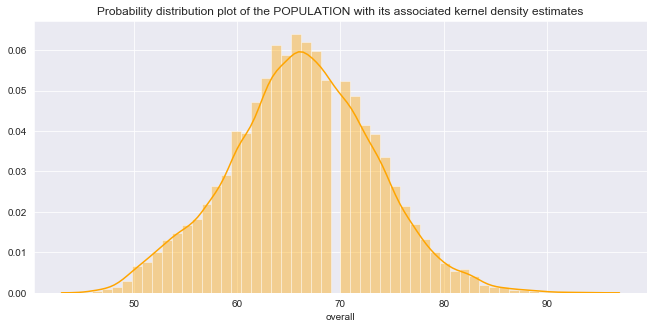

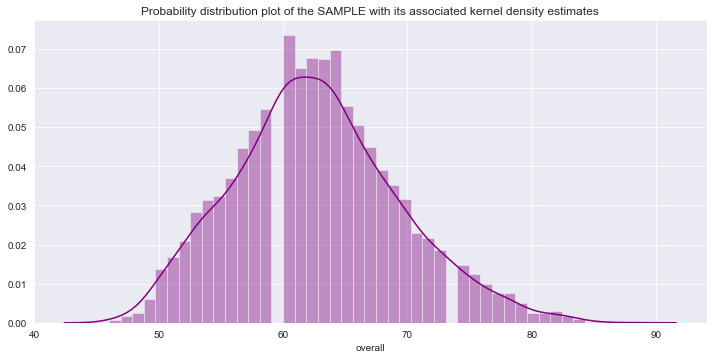

In [57]:
fig, ax = plt.subplots(figsize = (11, 5))
ax.set_title('Probability distribution plot of the POPULATION with its associated kernel density estimates')
fig, ax1 = plt.subplots(figsize = (11, 5))
ax1.set_title('Probability distribution plot of the SAMPLE with its associated kernel density estimates')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=1,
                    wspace=0.35)

#Population distribution
sns.distplot(fifa['overall'], ax = ax, color = 'orange')

#Sample distribution

sns.distplot(potential_df.potential_df(0.35), ax = ax1, color = 'purple')
plt.show()

## Why tests for normality are important:

The short answer: Many descriptive and predictive models rely on an assumption that the data (Ordinary Least Squares Linear Regression) are normally distributed.

The long answer:

Check the link -

http://letmegooglethat.com/?q=Why+tests+for+normality+are+important

## Section 1.2.2: t-test

To confirm our hypothesis, we use a t-test for difference of means. Our null hypothesis is that the means of the above two distributions are the same at a level of signifiance given by a probability value (p-value) calculated by the function . A p-value below *five* percent is low enough to accept the null. We can afford such a large burden of proof since the stakes of our outcome is not that significant (I mean, we're only talking about Dr. Asdfg's entire football career).

First, check the summary statistics of both distributions.

In [58]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

# source of above function: 
# https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side

display_side_by_side(pd.DataFrame(fifa['overall'].describe()), pd.DataFrame(potential_df.potential_df(.35).describe()))

,overall
count,17981.000000
mean,66.247984
std,6.987965
min,46.000000
25%,62.000000
50%,66.000000
75%,71.000000
max,94.000000
,overall
count,6990.000000


To use the *scipt.stats.ttest_1samp* function, we must check if the two sets have equal population variances. 

The standard deviations are not very different; which suggests that the variance will follow suit. But we confirm this

In [59]:
display(fifa['overall'].describe().loc['std']**2)
display(potential_df.potential_df(.35).describe().loc['std']**2)

48.831659589509854

44.3107243121267

In [60]:
scs.ttest_ind_from_stats(mean1 = potential_df.potential_df(.35).describe()['mean'] , std1 = potential_df.potential_df(.35).describe()['std'], nobs1 = potential_df.potential_df(.35).describe()['count'], mean2 = fifa['overall'].describe()['mean'], std2 = fifa['overall'].describe()['std'], nobs2 = fifa['overall'].describe()['count'], equal_var=True)

Ttest_indResult(statistic=-36.738576758282534, pvalue=8.063207558186205e-288)

We compute the absolute difference between the means, followed by the proportion of the difference between the means as a percentage of the population mean :

In [61]:
display(fifa['overall'].describe()['mean']- potential_df.potential_df(.35).describe()['mean'])
display(((fifa['overall'].describe()['mean'] - potential_df.potential_df(.35).describe()['mean']) / fifa['overall'].describe()['mean'] )*100)

3.5714460717914065

5.391026046472377

Below, we will plot a graph that shows the closeness of fit of a distribution to a normal one.

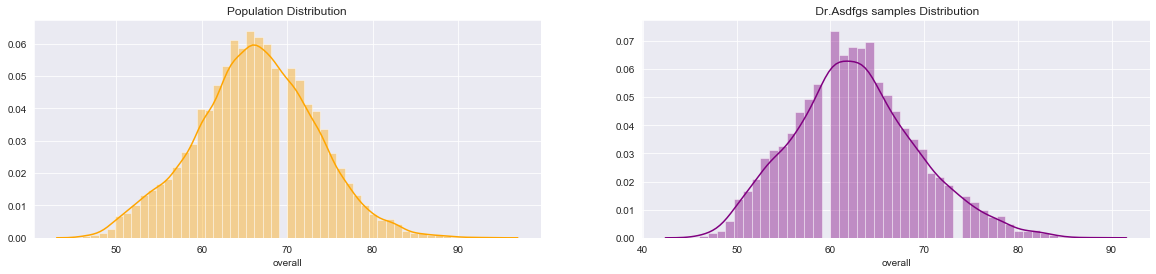

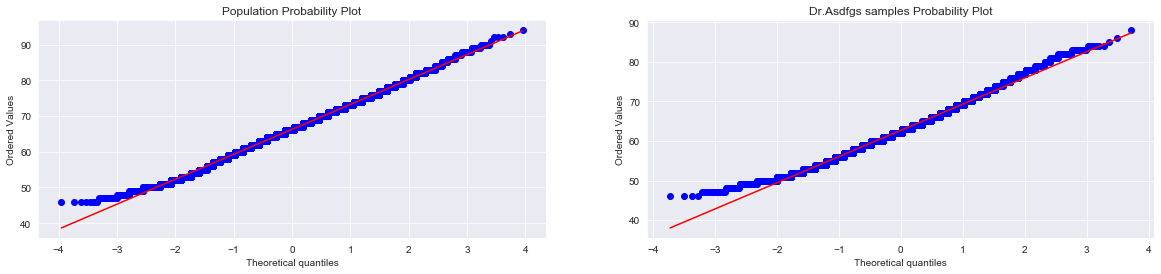

In [62]:
fig, ax1 = plt.subplots(1, 2, figsize = (20, 4))

sns.distplot(fifa['overall'], ax = ax1[0], color = 'orange')
ax1[0].set_title('Population Distribution')
sns.distplot(potential_df.potential_df(0.35), ax = ax1[1], color = 'purple')
ax1[1].set_title(' Dr.Asdfgs samples Distribution')

fig, ax = plt.subplots(1, 2, figsize = (20, 4))

scipy.stats.probplot(fifa['overall'], sparams=(), dist='norm', fit=True, plot=ax[0])
ax[0].set_title('Population Probability Plot')
scipy.stats.probplot(potential_df.potential_df(0.35), sparams=(), dist='norm', fit=True, plot=ax[1])
ax[1].set_title('Dr.Asdfgs samples Probability Plot')
plt.show()

### t-test interpretation:

Refer to the above plots:
The two plots on the left pertain to the ENTIRE dataset - including Dr. Asdfg (what we chose to call the Population)
The two plots on the right pertain to the sample data (the sample from which Dr. Asdfg is taken)

By inspection, it is not difficult to see that the sample from  which Dr. Asdfg will be considered (purple dustribution) is npt identical to population sample, which looks closer to a normal distribution The purple probability distribution is more skewed to the right. Also note that the mean is closer to the median for the population distribution. 
Looking at the visual tests for normality for the Population Distribution and the Dr. Asdfg's sample (bottom two), we draw the following a priori analyses:

The test for normality thus suggests that the population plot is closer to normal for most of the data(the tails of the data distort its normality).

Also, note the variance in the dataset. 

* The orange population plot has a higher variance (or standard deviation) - see summary above
 
* The purple sample plot has a lower variance (or standard deviation) - see summary above

* The above two observations are confirmed by the fact that the 'Theoretical Quantiles' spanned by the orange distribution (spanning 8 quantiles) are less than those of the purple distribution (spanning fewer than 8 quantiles). We would expect the variance of the normal-looking (orange) distribution to be lower, but this is not the case. Despite this the population probability plot's values follow the red line (normal) more closely than the sample probability plot does.




## Finally:
This gives rise to our results of the t test:

The very low p value  tells us that the test is significant, as is also confirmed by the high t value .

That is, we can reject the null hypothesis that the mean 'overall' rating of the two distriutions are equal,at an exact level of significance (p-value) that is almost zero. 

Confirming the difference between the sample means: 

$\approx (66 - 62) $, 
returns a value of $\approx 4$ . This is quite a large difference, given that it is $ 6\% $ of the larger set's (population's) 'overall' rating.

Note that differences between these means, is insignificant with low p-values. This is likely, since the sample sizes are very large, with almost 7 000 players for the smaller sample and more than 17 000 players in the entire dataset.

For purposes of the analysis in this report, 0.05 is a low enough burden of proof. We may manually compute the t stat using a level of significance of 0.05 and a [t-table](http://www.sthda.com/english/wiki/t-distribution-table), and obtain will get a significant test of similar means at a much higher level of significance. 

The result of the t-test help us understand the nature of the distribution:

With a sample mean that is statistically, and possibly even practically different, Dr. Asdfg will be sampled from a set that has poorer attributes. In other words, we may hypothesize that a player aged 18 - 23 is not likely to perform as well as his older counterparts. To create hope, though, we will run through some tests that Dr. Asdfg may want to consider before going pro.

## Side Section 1.2.3: t-test for difference in means with independent, identically distributed sample

An independently sampled data set, sampled a year earlier, with different players will be involved to gain confidence that our analyses are credible and reproducible.

#### Source: https://www.kaggle.com/rovilayjnr/fifa-17-datasets/data

In [63]:
fifa3 = pd.read_csv('DATASETS/FIFA17/FullData.csv')
fifa3.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,7/1/2009,2021.0,94,185 cm,80 kg,Right,2/5/1985,32,LW/ST,High / Low,4,5,93,92,22,23,31,63,96,94,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,7/1/2004,2018.0,93,170 cm,72 kg,Left,6/24/1987,29,RW,Medium / Medium,4,4,95,97,13,26,28,48,95,93,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,7/1/2013,2021.0,92,174 cm,68 kg,Right,2/5/1992,25,LW,High / Medium,5,5,95,96,21,33,24,56,88,90,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,7/11/2014,2021.0,92,182 cm,85 kg,Right,1/24/1987,30,ST,High / Medium,4,4,91,86,30,38,45,78,93,92,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,7/1/2011,2021.0,92,193 cm,92 kg,Right,3/27/1986,31,GK,Medium / Medium,4,1,48,30,10,11,10,29,85,12,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,91,89,95,90,89


In [64]:
fifa3 = fifa3['Rating']

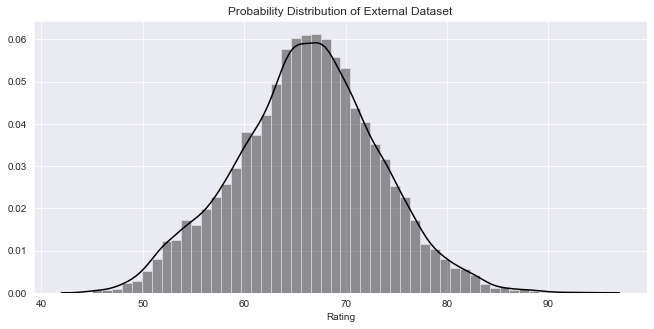

In [65]:
fig, ax = plt.subplots(figsize = (11, 5))
ax.set_title('Probability Distribution of External Dataset')
sns.distplot(fifa3, ax = ax, color = 'black')
plt.show()

In [66]:
display(fifa3.mean())
fifa['overall'].mean()

66.16619285876735

66.24798398309326

This distribution looks normal, as do the previous ones. The same test of significance could be done

In [67]:
scs.ttest_ind_from_stats(mean1 = fifa['overall'].describe()['mean'], std1 = fifa['overall'].describe()['std'], nobs1 = fifa['overall'].describe()['count'], mean2 = fifa3.describe()['mean'], std2 = fifa3.describe()['std'], nobs2 = fifa3.describe()['count'], equal_var=True)

Ttest_indResult(statistic=1.0962604398458815, pvalue=0.27297223905207857)

### t-test interpretation:

From the summary above, we notice that the mean of this and the 'fifa' datasets are painfully close to its median. That's one attribute of a normal distribution.

The test produces an extremely large probability of a type 1 error here: $0.27$, and we take this to mean that the means are so similar that we CANNOT reject the null hypothesis of similar means.

Between the t-test in Section 1.2.2 and the one done here, the difference is that the former had sample mean taken from a different distribution and were not independently sampled. This t-test had similar distributions and yielded a result that the means are not significantly different, as expected.

## Section 1.2.3: Player-Team Assessment

Finally, you can now compare Dr. Asdfg's attributes with those of other teams.
 
To find which team you could fit in, you think it may be a good idea to compare yourself to players who play for the best, worst, and average-performing nation to guage your chances of playing competitively. You decide to pick the best 15 players from those three squads. 

*Your comparison will be based on your **overall** rating vs their **overall** rating.*

##### (Please run the below cell only once per session )

In [68]:
nation_df = fifa.groupby('Nationality').mean()
nation_df = nation_df.sort_values('overall', ascending = True)
# Create nation column
nation_df['Nationality'] = nation_df.index.copy()
nation_df.insert(0, 'Nationality1', nation_df['Nationality'], allow_duplicates = False)
# Extract nation names

nation0 = pd.DataFrame(nation_df[nation_df['overall']==nation_df.quantile(0.0).overall])
nation50 = pd.DataFrame(nation_df[nation_df['overall']==nation_df.quantile(.5).overall])
nation100 = pd.DataFrame(nation_df[nation_df['overall']==nation_df.quantile(1.0).overall])

display(nation0)
display(nation50)
display(nation100)

,Nationality1,Age,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,overall,Sprint_Speed,Stamina,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Standing tackle,Strength,Vision,Volleys,count,Nationality
Nationality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Hong Kong,Hong Kong,17.0,71.0,38.0,78.0,74.0,53.0,40.0,39.0,54.0,72.0,65.0,33.0,48.0,30.0,30.0,7.0,7.0,7.0,5.0,6.0,48.0,53.0,58.0,51.0,27.0,47.0,40.0,25.0,55.0,58.0,43.0,53.0,54.0,42.0,53.0,25.0,1.0,Hong Kong
San Marino,San Marino,22.0,31.0,16.0,22.0,35.0,19.0,37.0,13.0,54.0,26.0,26.0,14.0,10.0,6.0,13.0,55.0,54.0,53.0,50.0,54.0,14.0,6.0,51.0,18.0,6.0,9.0,17.0,7.0,49.0,28.0,25.0,12.0,14.0,60.0,24.0,8.0,1.0,San Marino


,Nationality1,Age,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,overall,Sprint_Speed,Stamina,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Standing tackle,Strength,Vision,Volleys,count,Nationality
Nationality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Slovakia,Slovakia,25.625,61.25,53.703125,60.15625,61.203125,54.640625,56.0,45.828125,66.75,60.546875,61.015625,44.515625,50.609375,41.703125,40.78125,20.875,20.234375,20.515625,20.40625,21.21875,49.515625,46.21875,64.21875,51.578125,44.15625,42.734375,45.234375,46.40625,61.828125,56.453125,52.390625,44.4375,46.4375,65.5,52.28125,42.140625,1.0,Slovakia
Madagascar,Madagascar,28.500,79.50,50.250000,73.00000,70.750000,64.750000,58.0,60.500000,66.75,76.250000,71.500000,61.000000,68.000000,62.750000,57.50000,9.250,9.750000,10.500000,9.50000,9.25000,49.250000,39.00000,62.25000,56.000000,57.00000,31.500000,51.250000,62.25000,61.750000,59.750000,56.500000,31.5000,32.5000,58.0,57.00000,57.750000,1.0,Madagascar


,Nationality1,Age,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,overall,Sprint_Speed,Stamina,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Standing tackle,Strength,Vision,Volleys,count,Nationality
Nationality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Oman,Oman,35.0,41.0,40.0,60.0,53.0,17.0,56.0,16.0,73.0,55.0,41.0,13.0,14.0,18.0,11.0,75.0,59.0,72.0,72.0,78.0,16.0,22.0,74.0,25.0,12.0,11.0,13.0,13.0,76.0,66.0,22.0,11.0,11.0,64.0,44.0,18.0,1.0,Oman
Cuba,Cuba,27.5,82.5,76.0,78.0,80.5,71.0,71.0,54.5,73.0,79.5,78.0,58.5,74.5,58.5,51.5,11.5,12.5,12.5,13.5,9.5,55.0,43.0,61.5,64.0,65.5,43.5,59.5,65.0,69.5,73.0,77.0,42.5,43.5,76.5,65.0,61.5,1.0,Cuba


In [69]:
# Create DataFrames from the three national squads and pick their top 15
team0 = fifa[fifa['Nationality'] == nation0.Nationality1[0]][:15]
team50 = fifa[fifa['Nationality'] == nation50.Nationality1[0]][:15]
team100 = fifa[fifa['Nationality'] == nation100.Nationality1[0]][:15]

display(team0)
display(team50)
display(team100)

,Name,Age,Nationality,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Preferred_Position,Crossing,overall,Sprint_Speed,Stamina,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Standing tackle,Strength,Vision,Volleys,count
2941,Dai Wai-Tsun,17.0,Hong Kong,71.0,38.0,78.0,74.0,53.0,40.0,RM,39.0,54.0,72.0,65.0,33.0,48.0,30.0,30.0,7.0,7.0,7.0,5.0,6.0,48.0,53.0,58.0,51.0,27.0,47.0,40.0,25.0,55.0,58.0,43.0,53.0,54.0,42.0,53.0,25.0,1.0


,Name,Age,Nationality,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Preferred_Position,Crossing,overall,Sprint_Speed,Stamina,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Standing tackle,Strength,Vision,Volleys,count
28,R. Gergel,29.0,Slovakia,74.0,44.0,71.0,71.0,63.0,65.0,RM,60.0,65.0,76.0,85.0,64.0,59.0,57.0,41.0,13.0,9.0,13.0,12.0,7.0,53.0,53.0,62.0,59.0,56.0,52.0,54.0,68.0,66.0,61.0,66.0,45.0,47.0,72.0,57.0,65.0,1.0
151,J. Sylvestr,28.0,Slovakia,76.0,48.0,69.0,71.0,63.0,62.0,ST,41.0,64.0,78.0,63.0,58.0,64.0,65.0,47.0,11.0,10.0,15.0,10.0,8.0,56.0,21.0,73.0,40.0,61.0,12.0,66.0,61.0,62.0,53.0,67.0,16.0,17.0,58.0,38.0,63.0,1.0
161,E. Grendel,28.0,Slovakia,59.0,69.0,77.0,73.0,23.0,60.0,CM,55.0,64.0,26.0,21.0,56.0,23.0,57.0,58.0,8.0,15.0,14.0,10.0,12.0,54.0,66.0,84.0,62.0,57.0,62.0,61.0,57.0,66.0,23.0,61.0,59.0,64.0,20.0,61.0,58.0,1.0
232,M. HamÅ¡Ã­k,29.0,Slovakia,72.0,56.0,76.0,66.0,87.0,84.0,CM,78.0,87.0,75.0,85.0,80.0,86.0,78.0,72.0,8.0,6.0,4.0,14.0,14.0,74.0,72.0,71.0,82.0,83.0,60.0,70.0,88.0,88.0,88.0,82.0,62.0,73.0,69.0,86.0,79.0,1.0
568,M. Å krtel,32.0,Slovakia,54.0,80.0,52.0,52.0,59.0,71.0,CB,39.0,81.0,67.0,76.0,33.0,46.0,35.0,27.0,15.0,5.0,7.0,6.0,11.0,84.0,81.0,75.0,67.0,35.0,80.0,39.0,33.0,73.0,69.0,46.0,81.0,83.0,85.0,28.0,43.0,1.0
800,J. Kucka,30.0,Slovakia,69.0,86.0,75.0,54.0,77.0,78.0,CD,68.0,79.0,69.0,88.0,68.0,77.0,65.0,70.0,14.0,8.0,9.0,15.0,8.0,77.0,80.0,90.0,78.0,79.0,72.0,71.0,76.0,81.0,78.0,86.0,78.0,80.0,90.0,74.0,68.0,1.0
1178,J. Äurica,35.0,Slovakia,34.0,66.0,58.0,52.0,62.0,76.0,CB,55.0,77.0,33.0,68.0,60.0,54.0,30.0,67.0,7.0,16.0,7.0,8.0,15.0,81.0,78.0,74.0,67.0,58.0,78.0,14.0,20.0,73.0,62.0,83.0,79.0,79.0,86.0,56.0,40.0,1.0
1616,P. PekarÃ­k,30.0,Slovakia,75.0,66.0,73.0,77.0,76.0,73.0,RB,74.0,76.0,74.0,78.0,67.0,73.0,29.0,39.0,12.0,12.0,15.0,9.0,10.0,42.0,69.0,64.0,64.0,37.0,79.0,49.0,54.0,76.0,75.0,56.0,81.0,78.0,66.0,49.0,35.0,1.0
1655,M. LalkoviÄ,24.0,Slovakia,85.0,54.0,91.0,89.0,68.0,56.0,LM,57.0,64.0,83.0,69.0,69.0,67.0,55.0,53.0,11.0,11.0,6.0,12.0,16.0,42.0,26.0,75.0,50.0,57.0,39.0,55.0,59.0,60.0,55.0,53.0,36.0,37.0,60.0,53.0,55.0,1.0
1786,D. Rusov,24.0,Slovakia,44.0,25.0,52.0,50.0,20.0,26.0,GK,18.0,64.0,49.0,39.0,13.0,21.0,18.0,20.0,59.0,65.0,65.0,66.0,64.0,14.0,24.0,62.0,31.0,21.0,20.0,22.0,15.0,56.0,31.0,24.0,16.0,21.0,62.0,49.0,17.0,1.0


,Name,Age,Nationality,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Preferred_Position,Crossing,overall,Sprint_Speed,Stamina,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Standing tackle,Strength,Vision,Volleys,count
4706,A. Al-Habsi,35.0,Oman,41.0,40.0,60.0,53.0,17.0,56.0,GK,16.0,73.0,55.0,41.0,13.0,14.0,18.0,11.0,75.0,59.0,72.0,72.0,78.0,16.0,22.0,74.0,25.0,12.0,11.0,13.0,13.0,76.0,66.0,22.0,11.0,11.0,64.0,44.0,18.0,1.0


In [70]:
team0_with, team50_with, team100_with = pd.concat([team0, dr_Asdfg]), pd.concat([team50, dr_Asdfg]), pd.concat([team100, dr_Asdfg])

display(team0_with, team50_with, team100_with)

,Name,Age,Nationality,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Preferred_Position,Crossing,overall,Sprint_Speed,Stamina,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Standing tackle,Strength,Vision,Volleys,count
2941,Dai Wai-Tsun,17.0,Hong Kong,71.0,38.0,78.0,74.0,53.0,40.0,RM,39.0,54.0,72.0,65.0,33.0,48.0,30.0,30.0,7.0,7.0,7.0,5.0,6.0,48.0,53.0,58.0,51.0,27.0,47.0,40.0,25.0,55.0,58.0,43.0,53.0,54.0,42.0,53.0,25.0,1.0
7748,Dr.Asdfg - GOAT,25.0,Brazil,66.0,83.0,62.0,68.0,71.0,66.0,CM,54.0,68.0,60.0,78.0,59.0,70.0,50.0,66.0,13.0,9.0,13.0,14.0,12.0,41.0,63.0,53.0,66.0,45.0,53.0,54.0,66.0,73.0,71.0,77.0,55.0,61.0,64.0,62.0,61.0,1.0


,Name,Age,Nationality,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Preferred_Position,Crossing,overall,Sprint_Speed,Stamina,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Standing tackle,Strength,Vision,Volleys,count
28,R. Gergel,29.0,Slovakia,74.0,44.0,71.0,71.0,63.0,65.0,RM,60.0,65.0,76.0,85.0,64.0,59.0,57.0,41.0,13.0,9.0,13.0,12.0,7.0,53.0,53.0,62.0,59.0,56.0,52.0,54.0,68.0,66.0,61.0,66.0,45.0,47.0,72.0,57.0,65.0,1.0
151,J. Sylvestr,28.0,Slovakia,76.0,48.0,69.0,71.0,63.0,62.0,ST,41.0,64.0,78.0,63.0,58.0,64.0,65.0,47.0,11.0,10.0,15.0,10.0,8.0,56.0,21.0,73.0,40.0,61.0,12.0,66.0,61.0,62.0,53.0,67.0,16.0,17.0,58.0,38.0,63.0,1.0
161,E. Grendel,28.0,Slovakia,59.0,69.0,77.0,73.0,23.0,60.0,CM,55.0,64.0,26.0,21.0,56.0,23.0,57.0,58.0,8.0,15.0,14.0,10.0,12.0,54.0,66.0,84.0,62.0,57.0,62.0,61.0,57.0,66.0,23.0,61.0,59.0,64.0,20.0,61.0,58.0,1.0
232,M. HamÅ¡Ã­k,29.0,Slovakia,72.0,56.0,76.0,66.0,87.0,84.0,CM,78.0,87.0,75.0,85.0,80.0,86.0,78.0,72.0,8.0,6.0,4.0,14.0,14.0,74.0,72.0,71.0,82.0,83.0,60.0,70.0,88.0,88.0,88.0,82.0,62.0,73.0,69.0,86.0,79.0,1.0
568,M. Å krtel,32.0,Slovakia,54.0,80.0,52.0,52.0,59.0,71.0,CB,39.0,81.0,67.0,76.0,33.0,46.0,35.0,27.0,15.0,5.0,7.0,6.0,11.0,84.0,81.0,75.0,67.0,35.0,80.0,39.0,33.0,73.0,69.0,46.0,81.0,83.0,85.0,28.0,43.0,1.0
800,J. Kucka,30.0,Slovakia,69.0,86.0,75.0,54.0,77.0,78.0,CD,68.0,79.0,69.0,88.0,68.0,77.0,65.0,70.0,14.0,8.0,9.0,15.0,8.0,77.0,80.0,90.0,78.0,79.0,72.0,71.0,76.0,81.0,78.0,86.0,78.0,80.0,90.0,74.0,68.0,1.0
1178,J. Äurica,35.0,Slovakia,34.0,66.0,58.0,52.0,62.0,76.0,CB,55.0,77.0,33.0,68.0,60.0,54.0,30.0,67.0,7.0,16.0,7.0,8.0,15.0,81.0,78.0,74.0,67.0,58.0,78.0,14.0,20.0,73.0,62.0,83.0,79.0,79.0,86.0,56.0,40.0,1.0
1616,P. PekarÃ­k,30.0,Slovakia,75.0,66.0,73.0,77.0,76.0,73.0,RB,74.0,76.0,74.0,78.0,67.0,73.0,29.0,39.0,12.0,12.0,15.0,9.0,10.0,42.0,69.0,64.0,64.0,37.0,79.0,49.0,54.0,76.0,75.0,56.0,81.0,78.0,66.0,49.0,35.0,1.0
1655,M. LalkoviÄ,24.0,Slovakia,85.0,54.0,91.0,89.0,68.0,56.0,LM,57.0,64.0,83.0,69.0,69.0,67.0,55.0,53.0,11.0,11.0,6.0,12.0,16.0,42.0,26.0,75.0,50.0,57.0,39.0,55.0,59.0,60.0,55.0,53.0,36.0,37.0,60.0,53.0,55.0,1.0
1786,D. Rusov,24.0,Slovakia,44.0,25.0,52.0,50.0,20.0,26.0,GK,18.0,64.0,49.0,39.0,13.0,21.0,18.0,20.0,59.0,65.0,65.0,66.0,64.0,14.0,24.0,62.0,31.0,21.0,20.0,22.0,15.0,56.0,31.0,24.0,16.0,21.0,62.0,49.0,17.0,1.0


,Name,Age,Nationality,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Preferred_Position,Crossing,overall,Sprint_Speed,Stamina,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Standing tackle,Strength,Vision,Volleys,count
4706,A. Al-Habsi,35.0,Oman,41.0,40.0,60.0,53.0,17.0,56.0,GK,16.0,73.0,55.0,41.0,13.0,14.0,18.0,11.0,75.0,59.0,72.0,72.0,78.0,16.0,22.0,74.0,25.0,12.0,11.0,13.0,13.0,76.0,66.0,22.0,11.0,11.0,64.0,44.0,18.0,1.0
7748,Dr.Asdfg - GOAT,25.0,Brazil,66.0,83.0,62.0,68.0,71.0,66.0,CM,54.0,68.0,60.0,78.0,59.0,70.0,50.0,66.0,13.0,9.0,13.0,14.0,12.0,41.0,63.0,53.0,66.0,45.0,53.0,54.0,66.0,73.0,71.0,77.0,55.0,61.0,64.0,62.0,61.0,1.0


RuntimeError: libpng signaled error

<Figure size 0x216 with 1 Axes>

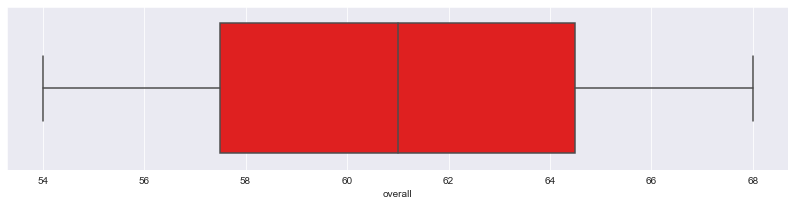

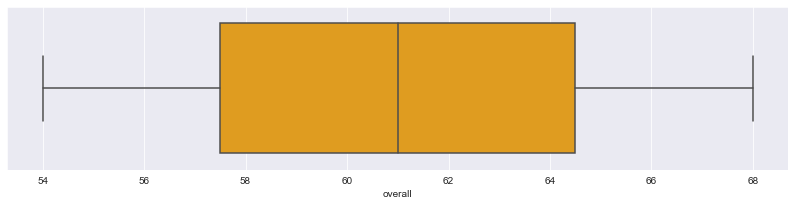

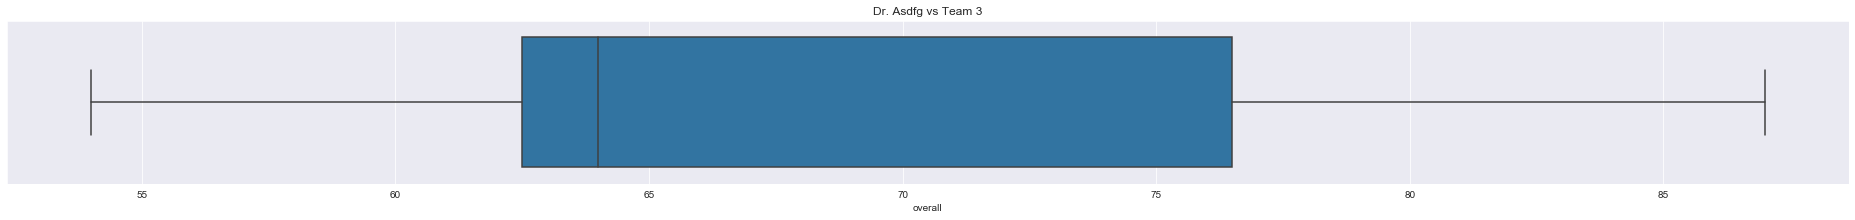

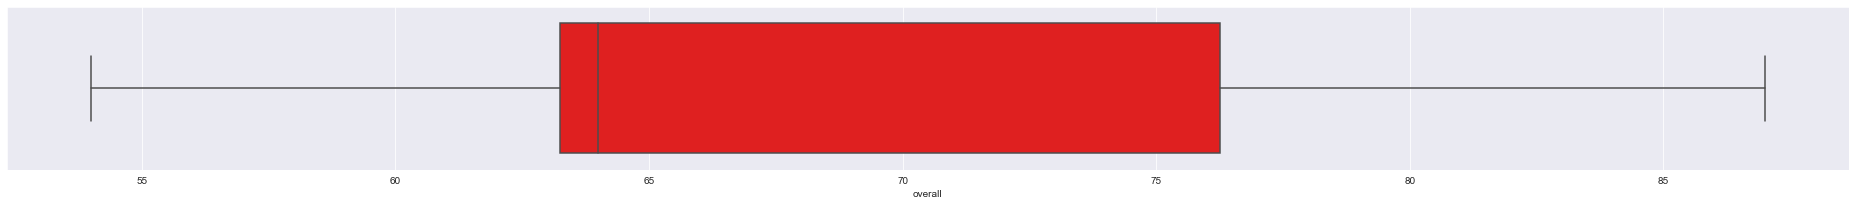

RuntimeError: libpng signaled error

<Figure size 0x216 with 1 Axes>

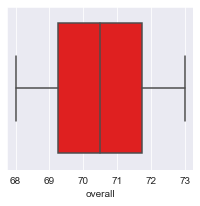

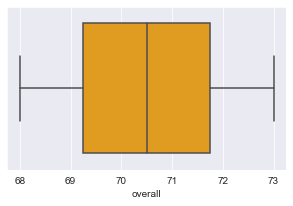

In [71]:
#set proportional axis sizes

team0_scale = team0.overall.max() - team0.overall.min()
team0_with_scale = team0_with.overall.max() - team0_with.overall.min()

team50_scale = team50.overall.max() - team50.overall.min()
team50_with_scale = team50_with.overall.max() - team50_with.overall.min()

team100_scale = team100.overall.max() - team100.overall.min()
team100_with_scale = team100_with.overall.max() - team100_with.overall.min()

sns.set_style("darkgrid")


fig, ax1 = plt.subplots(figsize = (team0_scale, 3))
sns.boxplot(None, team0['overall'], team0, orient = 'h', ax = ax1)
ax1.set_title('Dr. Asdfg vs Team 1')
fig, ax2 = plt.subplots(figsize = (team0_with_scale, 3))
sns.boxplot(None, team0_with['overall'], team0_with, orient = 'h', color = 'r', ax = ax2)
fig, ax7 = plt.subplots(figsize = (team0_with_scale, 3))
sns.boxplot(None, team0_with['overall'], team0_with, orient = 'h', color = 'orange', ax = ax7, whis = 3)

fig, ax3 = plt.subplots(figsize = (team50_scale, 3))
ax3.set_title('Dr. Asdfg vs Team 2')
sns.boxplot(None, team50['overall'], team50, orient = 'h', ax = ax3)
fig, ax4 = plt.subplots(figsize = (team50_with_scale, 3))
sns.boxplot(None, team50_with['overall'], team50_with, orient = 'h', color = 'r', ax = ax4)



fig, ax5 = plt.subplots(figsize = (team100_scale/1.5, 3))
sns.boxplot(None, team100['overall'], team100, orient = 'h', ax = ax5)
ax3.set_title('Dr. Asdfg vs Team 3')
fig, ax6 = plt.subplots(figsize = (team100_with_scale/1.5, 3))
sns.boxplot(None, team100_with['overall'], team100_with, orient = 'h', color = 'r', ax = ax6)

fig, ax7 = plt.subplots(figsize = (team100_with_scale, 3))
sns.boxplot(None, team100_with['overall'], team100_with, orient = 'h', color = 'orange', ax = ax7, whis = 3)
plt.show()

## Interpretation

Dr. Asdfg's best chance of making it to the big leagues is by playing for either:

* The worst national squad in the universe, where he will outshine everyone as an upper outlier
* The average performing team, where he would be able to blend in niely with the rest of the squd and maybe break the starting lineup
* The best team in the entire world, where he is unlikely to make even the bench if, by any chance, he gets scouted. He is, by far, a lower outlier

Dr. Asdfg can consider whether he can make his National squad. 

In [72]:
dr_Asdfg.overall

7748    68.0
Name: overall, dtype: float64

In [73]:
fifa2.groupby('Nationality').mean().sort_values('overall', ascending = False).loc[dr_Asdfg.Nationality,:].overall

Nationality
Brazil    70.89532
Name: overall, dtype: float64

Given his tender age, he should consider trials if his overall score is above the team average

It's been a long journey. Dr.Asdfg is adamant that he can make it as a professional footballer. As one of the last steps to  his preparation, he must consider his skill set. 

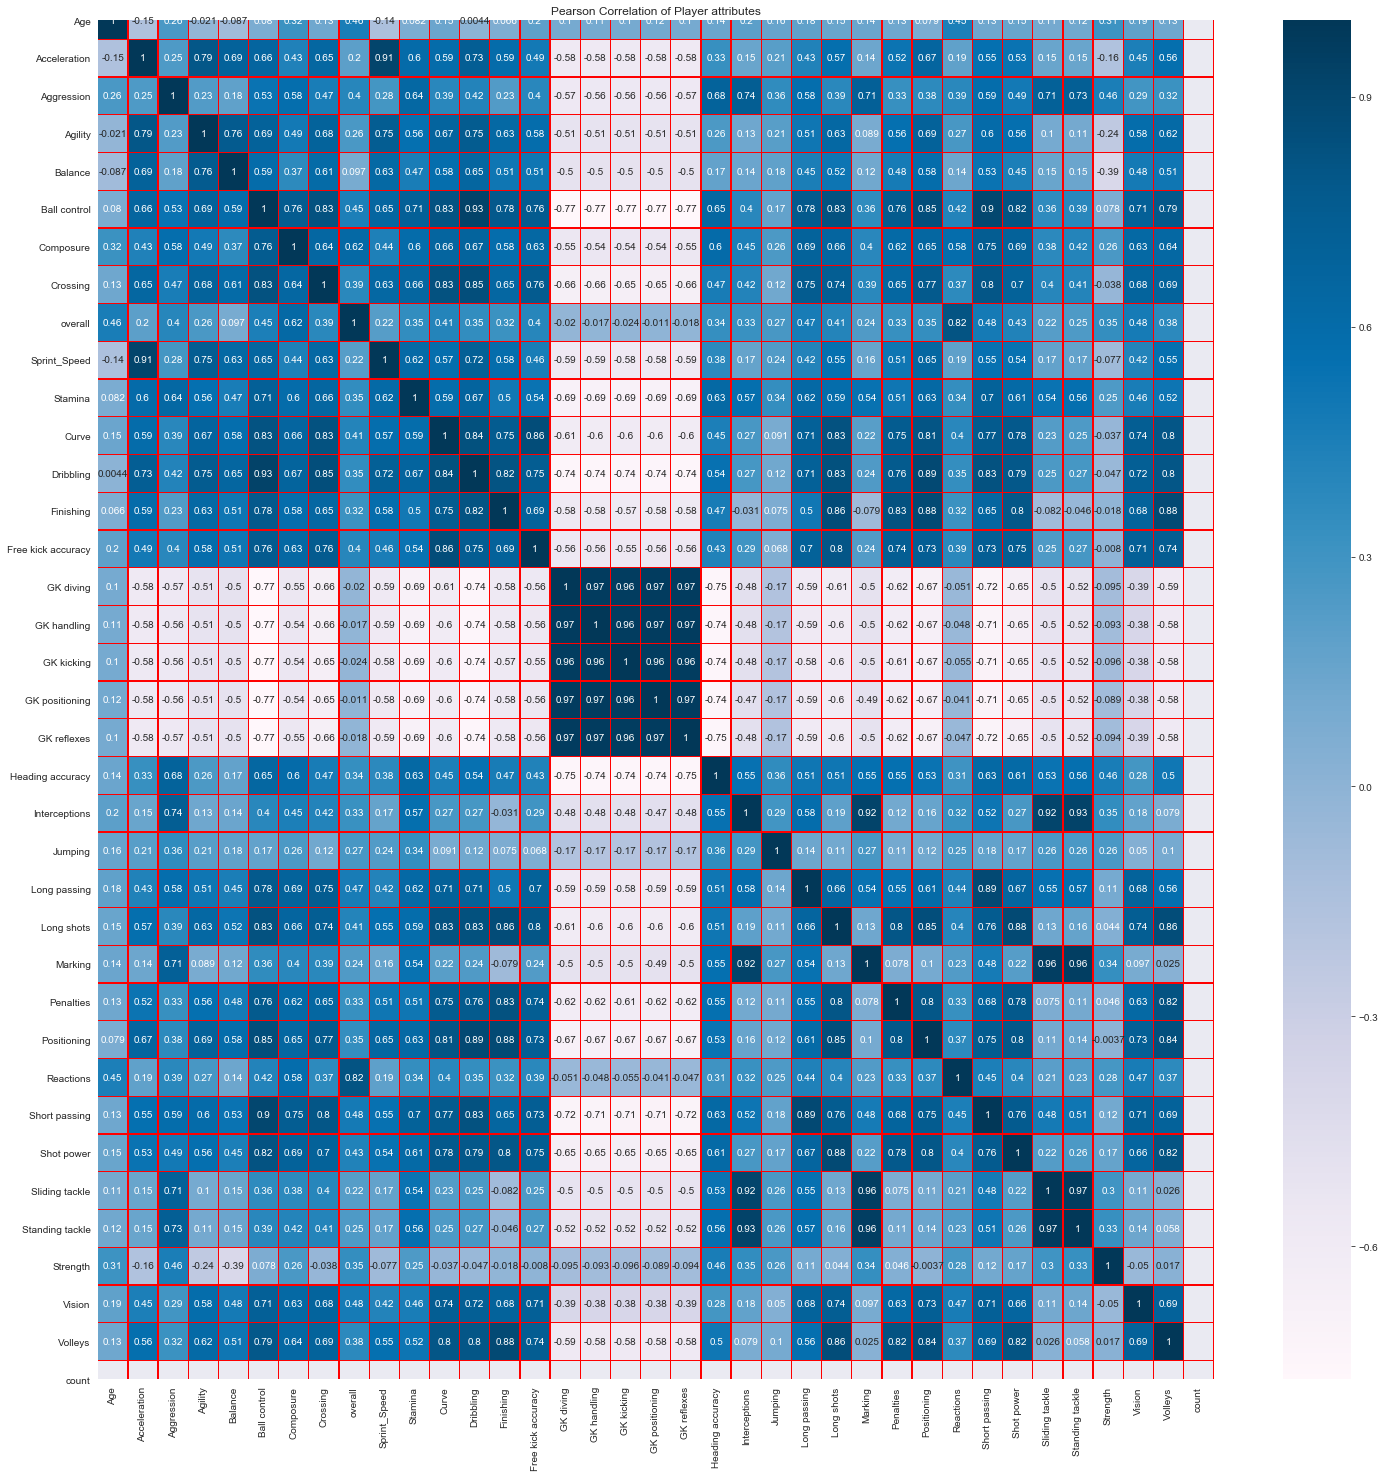

In [75]:
f, ax1 = plt.subplots(figsize=(25, 25))

plt.title('Pearson Correlation of Player attributes')

sns.heatmap(fifa2.corr(),linewidths=0.3,vmax=1.0, square=False, cmap = 'PuBu', linecolor='red', annot=True, ax = ax1)

plt.show()

As seen above, depending on his strengths, he may want to work on certain skills that can improve others For instance, he may want to work on his stamina and acceleration if he wants to improve his sprint speed. These 3 variables are somewhat causal in most cases, in the following order: Stamina and sprint acceleration determines sprint speed. In some cases, however, attribute relationships are not causal. For example, the Goalkeeper (or GK) attributes are not causal. Other correlated but non-causal variables are 'Positioning' and 'Finishing'. Both these attributes are naturally striker/forward/finisher attributes and so a forward would work on both these attributes simultaneously, as would a goalkeeper work on each attribute independently. Dr. Asdfg should keep these causal vs correlated relationships in mind.

One can easily see the other correlations between the other variables.


### CHAPTER 1 CONCLUSION:

The analyses above show plenty summary statistics of a team; and measures them against that of a player. A verdict that can be drawn here is that if a predictor would like to place a stake of support in a player, a good option is to bet on a player who chooses a team where he is relatively better than the rest of his team. It only stands to reason that since his abilities are likely to improve a team, he will be seen as a footballer with great career prospects.

All tests done in this report were aimed at helping the football community attain for themselves some developed perspectives when evaluating a player or team's performance. A series of tests were conducted in order to make the data used in this report useful to a reader.

We discussed how a player's attribute strength rating could affect a team and it was concluded that if one such player is to make it, he is better off playing for a team where he is relatively better than his teammates. It stands to reason that his abilities would stand out. The contribution of this discussion to the aim of this report: 'How to approach risk in football?' is as follows: 

A player who plays for a team where he is better is likely to be scouted by a bigger national squad and therefore likelier to make a decent career - good news for those rooting for him. Conditions for helping a player get better were discussed